<a href="https://colab.research.google.com/github/Elbx88/ML-Model-Perdiction/blob/main/Project_ML_Models_Erez_Levy_TMDB_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML Model Perdiction - Part VI - Model Selection and Fine Tuning & Model Evaluation

# The TMDB Dataset

The TMDB (The Movie Database) is a widely-used resource for movie and TV show data, providing valuable information such as ratings, plot summaries, and more.

This dataset contains a collection of 150,000 tv shows from the TMDB database, collected and cleaned.

# The Project Overview:


This dataset opens up a wide range of possibilities for data analysts and data scientists. Here are some ideas to get you started:

Explore trends in TV show popularity based on vote count and average.
Analyze TV show genres to identify the most popular genres or combinations of genres.
Investigate the relationship between TV show ratings and the number of seasons and episodes.
Build a recommendation system that suggests TV shows based on a user's favorite genres or languages.
Predict the success of a TV show based on features like vote count, average, and popularity.
Identify the most prolific TV show creators or production companies based on the number of shows they have created.
Explore the distribution of TV show run times and investigate whether episode duration affects the overall ratings.
Investigate TV show production trends across different countries and networks.
Analyze the relationship between TV show language and popularity, and investigate the popularity of non-English shows.
Track the status of TV shows (in production or not) and analyze their popularity over time.
Develop a language analysis model to identify sentiment or themes from TV show overviews.

I need to build a predictive model to determine the success of a TV show based on features like vote count, vote average, and popularity. We'll approach this as a regression problem, where we predict a continuous success metric, and we'll use multiple regression models.



**Approach**
Feature Selection: Choose the features you want to use for prediction (vote_count, vote_average, popularity, and potentially others like number_of_episodes, number_of_seasons).

Target Variable: Define the target variable. In this case, we'll use popularity as a measure of success.

Data Splitting: Split the data into training and testing sets.

Model Selection: Try several regression models:
Linear Regression: A good starting point for regression problems.
Random Forest Regressor: A more complex model that can capture non-linear relationships.
Gradient Boosting Regressor: Another advanced model known for good performance.

Model Training: Train the models on the training set.

Model Evaluation: Evaluate the models on the testing set using appropriate metrics (e.g., R-squared, Mean Absolute Error (MAE), Root Mean Squared Error (RMSE)).

Cross-Validation: Use Cross-Validation to ensure that the model does not overfit.

Hyperparameter Tuning: Use Hyperparameter Tuning to optimize the model parameters.

# Target Value prediction
Based on the potential insights and business value, I would suggest focusing on predicting either:

Popularity: It is a complex and dynamic metric that reflects overall success.
Vote Average (Rating): It captures audience satisfaction and critical acclaim.
Both of these targets have valuable real-world implications and can be approached with a variety of machine learning models.

Important Considerations:

Feature Engineering: Carefully select and engineer features from the TMDB data that you think will be most relevant to your chosen target variable.
Model Selection: Experiment with different machine learning models (regression for popularity or ratings, classification for status/renewal) to find the best performer.
Evaluation: Use appropriate metrics (like RMSE for regression or accuracy for classification) to assess the performance of your predictive model.

# Import the pickel file to load the Dataset tmdb_model from my Google Drive

In [1]:
import pickle
from google.colab import drive

# Mount Google Drive (if you haven't already)
drive.mount('/content/drive')

# Define the file path where the pickle file is located in your Google Drive
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_model.pkl'

# Load the data from the pickle file
try:
    with open(file_path, 'rb') as file:
        tmdb_model = pickle.load(file)
    print(f"tmdb_model loaded from {file_path} successfully.")

    # You can now use the loaded DataFrame (tmdb_model)
    # For example, you can display the first few rows:
    print(tmdb_model.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and ensure the file exists in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")

Mounted at /content/drive
tmdb_model loaded from /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_model.pkl successfully.
   name        id  number_of_episodes  vote_count       first_air_date  \
0    10   39280.0           -0.750294   -0.405268 -9223372036854775808   
1    42  222838.6           -0.328324    0.816389  1685232000000000000   
2   271  222838.6            0.093645   -0.405268  1400112000000000000   
3     1   34835.0            0.262433    3.666923  1160092800000000000   
4  5514   42598.0           -0.750294   -0.405268 -9223372036854775808   

         last_air_date  type  genres  created_by  languages  networks  \
0 -9223372036854775808     4      40       12070          7       178   
1  1687651200000000000     4      40       12088         20       169   
2  1405555200000000000     4      40       12070          7       178   
3  1166745600000000000     4      58       12070         20       178   
4 -9223372036854775808     4      21       12070      

# Imbalance Techniecs for the tmdb_model Dataset

In machine learning, imbalanced datasets refer to datasets where the distribution of classes is not equal. This means that one class (the majority class) has significantly more instances than another class (the minority class). This imbalance can pose a challenge for training machine learning models because the model might become biased towards the majority class and perform poorly on the minority class.

To address this issue, various imbalance techniques are used to rebalance the dataset or adjust the learning process to improve the model's performance on the minority class. Here are some common imbalance techniques:

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression  # Or any other classifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Define a binary target based on 'popularity' (Adjust the threshold as needed)
median_popularity = tmdb_model['popularity'].median()
tmdb_model['success'] = (tmdb_model['popularity'] > median_popularity).astype(int)

# 2. Define features (X) and target (y)
X = tmdb_model.drop(columns=['popularity', 'success'])
y = tmdb_model['success']

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Define resampling techniques
techniques = {
    "ROS": RandomOverSampler(random_state=42),
    "RUS": RandomUnderSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

# 5. Apply resampling and train a model
for technique_name, technique in techniques.items():
    # Resample the training data
    X_train_resampled, y_train_resampled = technique.fit_resample(X_train, y_train)

    # Initialize and train the model (e.g., Logistic Regression)
    model = LogisticRegression(random_state=42)
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Results for {technique_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}\n")

Results for ROS:
Accuracy: 0.7630
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.60      0.72      6229
           1       0.69      0.93      0.80      6085

    accuracy                           0.76     12314
   macro avg       0.80      0.76      0.76     12314
weighted avg       0.80      0.76      0.76     12314


Results for RUS:
Accuracy: 0.7630
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.60      0.72      6229
           1       0.69      0.93      0.80      6085

    accuracy                           0.76     12314
   macro avg       0.80      0.76      0.76     12314
weighted avg       0.80      0.76      0.76     12314


Results for SMOTE:
Accuracy: 0.7630
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.60      0.72      6229
           1       0.69      0.93      0.80      6085

    acc

# 6. Model Selection and Fine Tuning

Model Selection: Choose appropriate machine learning models based on the problem at hand (e.g., regression, classification, clustering).



# Support Vector Machine

SVM is a supervised ML Algorithm which can be used for both classification and regresstion models

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Using 'tmdb_model' as DataFrame

df = tmdb_model.copy()  # Create a copy of the DataFrame
df

,name,id,number_of_episodes,vote_count,first_air_date,last_air_date,type,genres,created_by,languages,networks,origin_country,production_companies,air_time,log_popularity,total_runtime,popularity,success
0,10,39280.0,-0.750294,-0.405268,-9223372036854775808,-9223372036854775808,4,40,12070,7,178,496,86,49.0,0.904220,-0.540705,0.470004,0
1,42,222838.6,-0.328324,0.816389,1685232000000000000,1687651200000000000,4,40,12088,20,169,349,86,28.0,1.314755,0.008055,1.723837,1
2,271,222838.6,0.093645,-0.405268,1400112000000000000,1405555200000000000,4,40,12070,7,178,198,86,63.0,0.904220,-0.540705,0.470004,0
3,1,34835.0,0.262433,3.666923,1160092800000000000,1166745600000000000,4,58,12070,20,178,349,86,77.0,1.476119,0.249509,2.375928,1
4,5514,42598.0,-0.750294,-0.405268,-9223372036854775808,-9223372036854775808,4,21,12070,7,178,496,86,49.0,0.904220,-0.540705,0.470004,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82863,78091,84266.0,-0.412718,-0.405268,1302393600000000000,1304208000000000000,4,40,12070,21,178,366,86,21.0,0.911219,-0.540705,0.487352,0
82864,78092,94494.0,-0.665900,-0.405268,1238457600000000000,1238457600000000000,5,55,12070,21,178,496,86,0.0,1.056216,-0.441928,0.875469,1
82865,78093,221510.0,-0.328324,0.001951,1677715200000000000,1679529600000000000,0,40,12070,21,70,366,86,21.0,0.904220,-0.540705,0.470004,0
82866,78094,210803.0,-0.665900,-0.405268,1593388800000000000,1593388800000000000,4,10,12070,21,178,366,86,0.0,0.904220,-0.540705,0.470004,0


# Classification Report

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[5446 3916]
 [ 375 8733]]
              precision    recall  f1-score   support

           0       0.94      0.58      0.72      9362
           1       0.69      0.96      0.80      9108

    accuracy                           0.77     18470
   macro avg       0.81      0.77      0.76     18470
weighted avg       0.81      0.77      0.76     18470



# Confusion Metrix

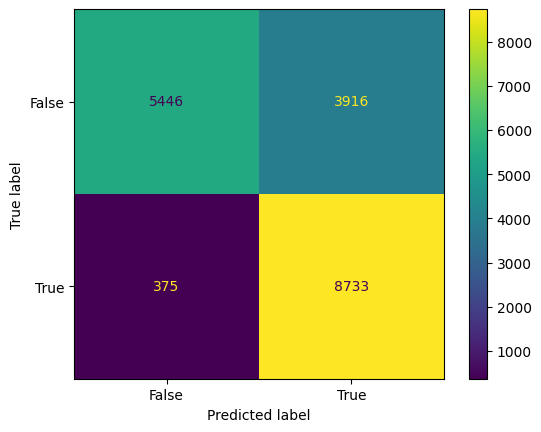

In [6]:
import sklearn.metrics as skmet
cmat=skmet.confusion_matrix(y_test,predictions)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix = cmat, display_labels = [False, True])
cmat=skmet.confusion_matrix(y_test,predictions)
cm_display.plot()
plt.show()

# Gridsearch:
**The machine learning find the optimal hyperparameters for a model. It helps improve model performance by systematically exploring different combinations of hyperparameter values and selecting the combination that yields the best results.**

hyperparameter trade-off     
Gread Search Cross-Validation     
C - achieving a low training error and a low testing error.0.1 week regulation<br>
gamma - controls the width of the radial basis function     
RFB: Radial Basis Function (linear, sigmoid, poly)     

In [7]:
param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01], 'kernel': ['sigmoid']}
print(classification_report(y_test,predictions))

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.58      0.72      9362
           1       0.69      0.96      0.80      9108

    accuracy                           0.77     18470
   macro avg       0.81      0.77      0.76     18470
weighted avg       0.81      0.77      0.76     18470

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=  22.9s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=  22.4s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=  23.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=  22.3s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=  22.5s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=  22.8s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=  22.4s
[CV] END ...................C=0.1, gamma=0.1, 

**Grid Search Cross-Validation:**

Improved Model Performance: By systematically exploring different hyperparameter values, you are more likely to find the optimal settings that lead to better model performance.
Reduced Overfitting: Cross-validation helps prevent overfitting by evaluating the model on multiple subsets of the data.
Automation: Grid search automates the process of hyperparameter tuning, saving you time and effort.

In [8]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}

In [9]:
grid_predictions = grid.predict(X_test)

In [10]:
grid.best_params_
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[5572 3790]
 [ 617 8491]]
              precision    recall  f1-score   support

           0       0.90      0.60      0.72      9362
           1       0.69      0.93      0.79      9108

    accuracy                           0.76     18470
   macro avg       0.80      0.76      0.76     18470
weighted avg       0.80      0.76      0.75     18470



In [11]:
tmdb_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61566 entries, 0 to 82871
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  61566 non-null  int64  
 1   id                    61566 non-null  float64
 2   number_of_episodes    61566 non-null  float64
 3   vote_count            61566 non-null  float64
 4   first_air_date        61566 non-null  int64  
 5   last_air_date         61566 non-null  int64  
 6   type                  61566 non-null  int64  
 7   genres                61566 non-null  int64  
 8   created_by            61566 non-null  int64  
 9   languages             61566 non-null  int64  
 10  networks              61566 non-null  int64  
 11  origin_country        61566 non-null  int64  
 12  production_companies  61566 non-null  int64  
 13  air_time              61566 non-null  float64
 14  log_popularity        61566 non-null  float64
 15  total_runtime         61

# SVC - Support Vector Classifier

The Support Vector Classifier (SVC) is a supervised machine learning algorithm used for classification tasks. It aims to find an optimal hyperplane that best separates data points into different classes.

In [12]:
model = SVC(C=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [13]:
model.score(X_train, y_train)

0.7767542231297568

In [14]:
model.score(X_test, y_test)

0.7676773145641581

# SVR - Support Vector Regressor

The principles as the Support Vector Classifier (SVC) but is adapted to predict continuous target variables instead of discrete classes.



In [15]:
# Using 'tmdb_model' as DataFrame that contains the features and 'popularity' is a column

# Selecting the features  to include in df2
features = [col for col in tmdb_model.columns if col != 'popularity']  # Exclude the target variable

# Create df2 using the selected features
df2 = tmdb_model[features].copy()

# Add the popularity column to the DataFrame
df2['popularity'] = tmdb_model['popularity']

y=df2['popularity']
X = df2.drop(columns=['popularity'])

from sklearn.svm import SVR

from sklearn.model_selection import train_test_split

model1 = SVR()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model1.fit(X_train,y_train)

predictions1 = model1.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, predictions1)
mse = mean_squared_error(y_test, predictions1)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions1)

# Calculate RMSLE
rmsle = np.sqrt(mean_squared_error(np.log1p(y_test), np.log1p(predictions1)))

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared (R²): {r2:.3f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.3f}")

Mean Absolute Error (MAE): 0.301
Mean Squared Error (MSE): 0.197
Root Mean Squared Error (RMSE): 0.444
R-squared (R²): 0.128
Root Mean Squared Logarithmic Error (RMSLE): 0.207


# Classification Models

#  Linear Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,  export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

models_list = pd.DataFrame()

mod1 = LinearRegression() # Use Linear Regression for continuous target
mod1.fit(X,y)

pred1 = mod1.predict(X)

# For regression, use metrics like MSE, MAE, R-squared
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y, pred1)
mae = mean_absolute_error(y, pred1)
r2 = r2_score(y, pred1)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R²): {r2:.3f}")

Mean Squared Error (MSE): 0.191
Mean Absolute Error (MAE): 0.296
R-squared (R²): 0.189


# Decision Tree

In [17]:
# Using DecisionTreeRegressor for continuous targets
from sklearn.tree import DecisionTreeRegressor

mod2 = DecisionTreeRegressor(random_state=1) # Changed to DecisionTreeRegressor
mod2.fit(X, y)

pred2 = mod2.predict(X)

# For regression, use metrics like MSE, MAE, R-squared
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y, pred2)
mae = mean_absolute_error(y, pred2)
r2 = r2_score(y, pred2)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R²): {r2:.3f}")

Mean Squared Error (MSE): 0.000
Mean Absolute Error (MAE): 0.000
R-squared (R²): 1.000


# Linear Regression:

Type: Linear regression is a classic and widely used regression model that assumes a linear relationship between the features and the target variable (popularity).

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'tmdb_model' is your DataFrame
# Select features and target variable
features = ['vote_count','number_of_episodes','success','log_popularity']
target = 'popularity'

X = tmdb_model[features]
y = tmdb_model[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
#model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Example prediction: Create a sample data point for prediction
# Ensure the columns are in the same order as in X_train
# sample_data = pd.DataFrame({'success': [8.5], 'vote_count': [1000], 'number_of_episodes': [30],'log_popularity':[100]}) # This line is changed below
sample_data = pd.DataFrame([[1000, 30, 8.5, 100]],  # Values are reordered here to match features order
                           columns=features) # Using features list to ensure correct order

# Predict popularity for the sample data
predicted_popularity = model.predict(sample_data)
print(f"Predicted Popularity for sample data: {predicted_popularity[0]}")

Mean Squared Error: 0.0008934914042647157
R-squared: 0.9960616432487804
Predicted Popularity for sample data: 328.28004412223277


#Random Forest Regressor:

Type: An ensemble learning method that builds multiple decision trees and averages their predictions to improve accuracy and robustness.

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor

# Assuming 'tmdb_filtered' is your DataFrame
# Select features and target variable
features = ['vote_count','number_of_episodes','success','log_popularity']
target = 'popularity'

X = tmdb_model[features]
y = tmdb_model[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
#model = LinearRegression()
model=RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Example prediction:
# Create a sample data point for prediction
# Ensure the columns match the features used during training
sample_data = pd.DataFrame([[1000, 30, 8.5, 100]], columns=features) # Using the same features and order

# Predict popularity for the sample data
predicted_popularity = model.predict(sample_data)
print(f"Predicted Popularity for sample data: {predicted_popularity[0]}")

Mean Squared Error: 6.086526830596896e-09
R-squared: 0.9999999731716345
Predicted Popularity for sample data: 2.8403101906786956


# The XGBoost model

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Assuming tmdb_model is your DataFrame with features and target variable 'popularity'

# 1. Define features (X) and target (y)
X = tmdb_model.drop('popularity', axis=1)  # Features (all columns except 'popularity')
y = tmdb_model['popularity']  # Target variable

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train the XGBoost model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Specify regression objective
    n_estimators=100,  # Number of boosting rounds (trees)
    learning_rate=0.1,  # Step size shrinkage used in update to prevents overfitting
    max_depth=3,  # Maximum depth of a tree
    subsample=0.8,  # Subsample ratio of the training instance
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    random_state=42  # Random seed for reproducibility
)

xgb_model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# 5. Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# 6. (Optional) Feature Importance
feature_importance = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
print("\nFeature Importance:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Root Mean Squared Error (RMSE): 0.008258085218293059
R-squared (R2): 0.9996994038628989

Feature Importance:
                 Feature  Importance
14        log_popularity    0.586415
16               success    0.227535
3             vote_count    0.085567
2     number_of_episodes    0.058652
15         total_runtime    0.010184
6                   type    0.009096
7                 genres    0.006674
10              networks    0.005700
0                   name    0.004718
9              languages    0.003097
5          last_air_date    0.001573
1                     id    0.000364
13              air_time    0.000349
4         first_air_date    0.000036
8             created_by    0.000035
11        origin_country    0.000005
12  production_companies    0.000000


# Models Selection and finetuning

In [21]:
tmdb_model.isna().sum()

,0
name,0
id,0
number_of_episodes,0
vote_count,0
first_air_date,0
last_air_date,0
type,0
genres,0
created_by,0
languages,0


# TMDB Regression Models and Regression Metrics

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics
import math
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def regressionMetrics(y, yhat):
    res = {'MSE': metrics.mean_squared_error(y,yhat),
           'RMSE': np.sqrt(metrics.mean_squared_error(y,yhat)),
           'MAE': metrics.mean_absolute_error(y,yhat),
           'RMSLE': np.sqrt(metrics.mean_squared_log_error(y,yhat))
          }
    return res


# Regression Models

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
#!pip install xgboost
import xgboost

X = tmdb_model.loc[:,tmdb_model.columns != 'popularity']
y = tmdb_model['popularity']

# Linear Regression

In [24]:
mod1 = LinearRegression()
mod1.fit(X,y)

pred1 = mod1.predict(X)
regressionMetrics(y, pred1)

{'MSE': 0.19086734267700753,
 'RMSE': np.float64(0.4368836717903377),
 'MAE': 0.29560924665833344,
 'RMSLE': np.float64(0.2064126025673137)}

In [25]:
model_dict = {'model': "Linear Regression"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred1)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,0.190867,0.436884,0.295609,0.206413


<Axes: xlabel='popularity'>

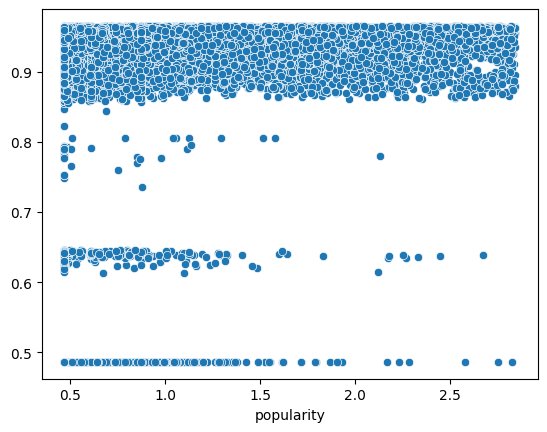

In [26]:
sns.scatterplot(x=y, y=pred1)

# Decision Tree

In [27]:
mod2 = DecisionTreeRegressor(random_state=1)
mod2.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [28]:
pred2 = mod2.predict(X)
model_dict = {'model': "Decision Tree"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred2)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,1.908673e-01,4.368837e-01,2.956092e-01,2.064126e-01
1,Decision Tree,2.844446e-27,5.333335e-14,3.397265e-14,3.624678e-14


<Axes: xlabel='popularity'>

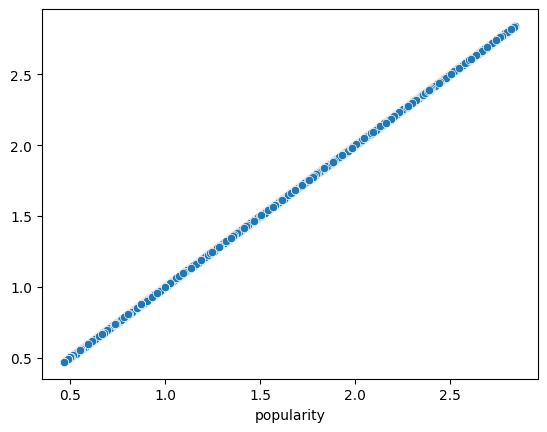

In [29]:
sns.scatterplot(x=y, y=pred2)

# Random Forest

In [30]:
mod3 = RandomForestRegressor(random_state=1)
mod3.fit(X,y)

RandomForestRegressor(random_state=1)

In [31]:
pred3 = mod3.predict(X)
model_dict = {'model': "RandomForest"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred3)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,1.908673e-01,4.368837e-01,2.956092e-01,2.064126e-01
1,Decision Tree,2.844446e-27,5.333335e-14,3.397265e-14,3.624678e-14
2,RandomForest,1.259629e-09,3.549125e-05,8.961293e-06,1.115484e-05


<Axes: xlabel='popularity'>

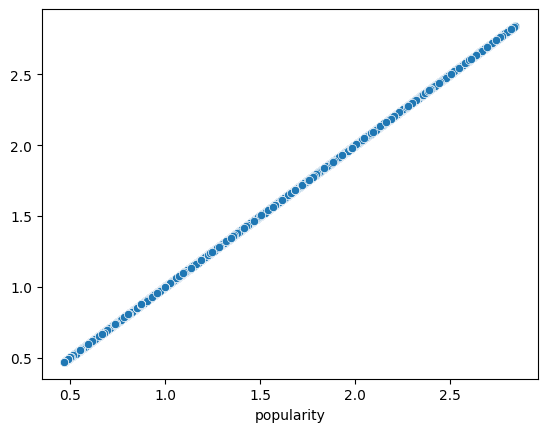

In [32]:
sns.scatterplot(x=y, y=pred3)

# Adaptive Boosting (ADABoost)

In [33]:
mod4 = AdaBoostRegressor(random_state=1)
mod4.fit(X,y)

AdaBoostRegressor(random_state=1)

In [34]:
pred4 = mod4.predict(X)
model_dict = {'model': "ADABoost"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred4)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,1.908673e-01,4.368837e-01,2.956092e-01,2.064126e-01
1,Decision Tree,2.844446e-27,5.333335e-14,3.397265e-14,3.624678e-14
2,RandomForest,1.259629e-09,3.549125e-05,8.961293e-06,1.115484e-05
3,ADABoost,8.441476e-04,2.905422e-02,1.963700e-02,1.450485e-02


<Axes: xlabel='popularity'>

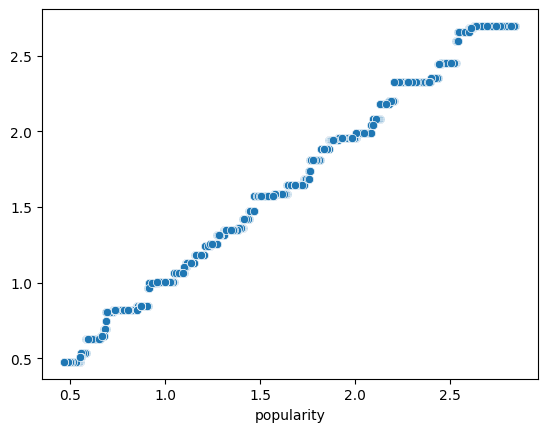

In [35]:
sns.scatterplot(x=y, y=pred4)

# Gradient Boosting Machine (GBM)

In [36]:
mod5 = GradientBoostingRegressor(random_state=1)
mod5.fit(X,y)

GradientBoostingRegressor(random_state=1)

In [37]:
pred5 = mod5.predict(X)
model_dict = {'model': "GBM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred5)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,1.908673e-01,4.368837e-01,2.956092e-01,2.064126e-01
1,Decision Tree,2.844446e-27,5.333335e-14,3.397265e-14,3.624678e-14
2,RandomForest,1.259629e-09,3.549125e-05,8.961293e-06,1.115484e-05
3,ADABoost,8.441476e-04,2.905422e-02,1.963700e-02,1.450485e-02
4,GBM,8.547772e-06,2.923657e-03,1.469176e-03,1.269715e-03


<Axes: xlabel='popularity'>

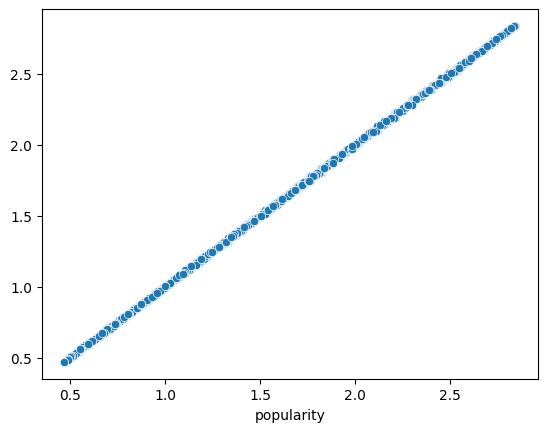

In [38]:
sns.scatterplot(x=y, y=pred5)

# Support Vector Regressor (SVR)

The Support Vector Regressor (SVR) is a powerful machine learning algorithm used for regression tasks. It's based on the same principles as the Support Vector Machine (SVM) but adapted for predicting continuous target variables instead of discrete classes.

In [38]:
mod6 = SVR()
mod6.fit(X,y)

SVR()

In [39]:
pred6 = mod6.predict(X)
model_dict = {'model': "SVR"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred6)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,1.908673e-01,4.368837e-01,2.956092e-01,2.064126e-01
1,Decision Tree,2.844446e-27,5.333335e-14,3.397265e-14,3.624678e-14
2,RandomForest,1.259629e-09,3.549125e-05,8.961293e-06,1.115484e-05
3,ADABoost,8.441476e-04,2.905422e-02,1.963700e-02,1.450485e-02
4,GBM,8.547772e-06,2.923657e-03,1.469176e-03,1.269715e-03
5,SVM,2.062568e-01,4.541550e-01,3.056755e-01,2.096053e-01


<Axes: xlabel='popularity'>

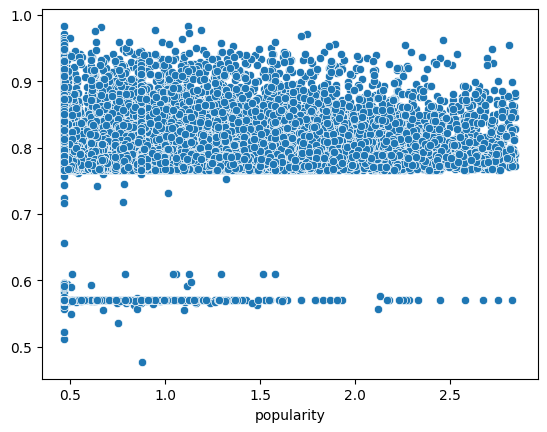

In [40]:
sns.scatterplot(x=y, y=pred6)

# XGBoost Regressor

In [41]:
mod7= xgb.XGBRegressor()
mod7.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
pred7 = mod7.predict(X)
model_dict = {'model': "XGB"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred7)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,1.908673e-01,4.368837e-01,2.956092e-01,2.064126e-01
1,Decision Tree,2.844446e-27,5.333335e-14,3.397265e-14,3.624678e-14
2,RandomForest,1.259629e-09,3.549125e-05,8.961293e-06,1.115484e-05
3,ADABoost,8.441476e-04,2.905422e-02,1.963700e-02,1.450485e-02
4,GBM,8.547772e-06,2.923657e-03,1.469176e-03,1.269715e-03
5,SVM,2.062568e-01,4.541550e-01,3.056755e-01,2.096053e-01
6,XGB,3.249372e-06,1.802601e-03,9.003679e-04,7.298952e-04


<Axes: xlabel='popularity'>

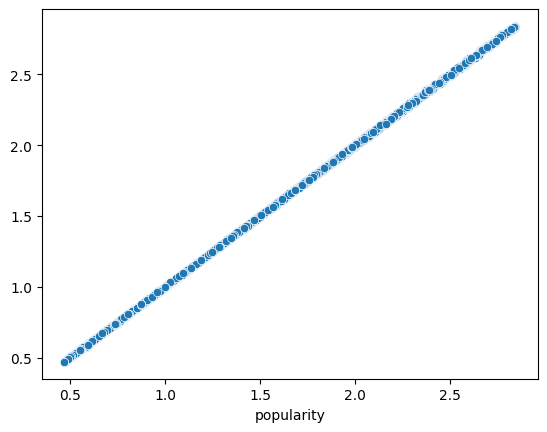

In [43]:
sns.scatterplot(x=y, y=pred7)

# Best Model Selection
**Metrics:**

MSE - Mean Squared Error

RMSE Root Mean Squared Error

MAE Mean Absolute Error - Calculates the average of the absolute differences between predicted and actual values.

RMSLE Root Mean Squared Logarithmic Error

In [44]:
models_list.sort_values('MAE')

,model,MSE,RMSE,MAE,RMSLE
1,Decision Tree,2.844446e-27,5.333335e-14,3.397265e-14,3.624678e-14
2,RandomForest,1.259629e-09,3.549125e-05,8.961293e-06,1.115484e-05
6,XGB,3.249372e-06,1.802601e-03,9.003679e-04,7.298952e-04
4,GBM,8.547772e-06,2.923657e-03,1.469176e-03,1.269715e-03
3,ADABoost,8.441476e-04,2.905422e-02,1.963700e-02,1.450485e-02
0,Linear Regression,1.908673e-01,4.368837e-01,2.956092e-01,2.064126e-01
5,SVM,2.062568e-01,4.541550e-01,3.056755e-01,2.096053e-01


In [45]:
models_list.sort_values('RMSE')

,model,MSE,RMSE,MAE,RMSLE
1,Decision Tree,2.844446e-27,5.333335e-14,3.397265e-14,3.624678e-14
2,RandomForest,1.259629e-09,3.549125e-05,8.961293e-06,1.115484e-05
6,XGB,3.249372e-06,1.802601e-03,9.003679e-04,7.298952e-04
4,GBM,8.547772e-06,2.923657e-03,1.469176e-03,1.269715e-03
3,ADABoost,8.441476e-04,2.905422e-02,1.963700e-02,1.450485e-02
0,Linear Regression,1.908673e-01,4.368837e-01,2.956092e-01,2.064126e-01
5,SVM,2.062568e-01,4.541550e-01,3.056755e-01,2.096053e-01


In [46]:
models_list.sort_values('RMSLE')

,model,MSE,RMSE,MAE,RMSLE
1,Decision Tree,2.844446e-27,5.333335e-14,3.397265e-14,3.624678e-14
2,RandomForest,1.259629e-09,3.549125e-05,8.961293e-06,1.115484e-05
6,XGB,3.249372e-06,1.802601e-03,9.003679e-04,7.298952e-04
4,GBM,8.547772e-06,2.923657e-03,1.469176e-03,1.269715e-03
3,ADABoost,8.441476e-04,2.905422e-02,1.963700e-02,1.450485e-02
0,Linear Regression,1.908673e-01,4.368837e-01,2.956092e-01,2.064126e-01
5,SVM,2.062568e-01,4.541550e-01,3.056755e-01,2.096053e-01


# Model Random Forest Regressor -Grid Serch  

Grid Search is a hyperparameter tuning technique used in machine learning to find the optimal combination of hyperparameters for a model. It works by systematically exploring a predefined set of hyperparameter values and evaluating the model's performance for each combination. The combination that yields the best performance is selected as the optimal set of hyperparameters.

In [47]:
from sklearn.model_selection import GridSearchCV

# Splitting the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search

param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
}

# Create a base model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
#Verbose - level of details that will be provided in each iteration
# Fit the grid search to the data
grid_search.fit(X, y)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
648 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
541 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py"

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=2)

# Finding the Best Parameters and Best Score

In [48]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Best Parameters: {'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: -0.9958960035931731


# XGBoost Fine Tuning

XGBoost (Extreme Gradient Boosting) is a powerful gradient boosting algorithm known for its high performance in various machine learning tasks. While XGBoost often performs well with default hyperparameters, fine-tuning these hyperparameters can further improve its performance and prevent overfitting.

Candidates cross-validation on numner of hyperparameter combinations

Totalling resulting in 1,944 total model training and evaluation runs.

In [50]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Assuming X and y are defined here (dataframes/arrays containing training data and target variable)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
}

# Create a base model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
#Verbose - level of details that will be provided in each iteration
# Fit the grid search to the data
grid_search.fit(X, y)


# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

# Make predictions
pred8 = grid_search.predict(X)

model_dict = {'model': "XGB_FT"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred8)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
648 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
532 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py"

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: -0.9959766744057422


,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,1.908673e-01,4.368837e-01,2.956092e-01,2.064126e-01
1,Decision Tree,2.844446e-27,5.333335e-14,3.397265e-14,3.624678e-14
2,RandomForest,1.259629e-09,3.549125e-05,8.961293e-06,1.115484e-05
3,ADABoost,8.441476e-04,2.905422e-02,1.963700e-02,1.450485e-02
4,GBM,8.547772e-06,2.923657e-03,1.469176e-03,1.269715e-03
5,SVM,2.062568e-01,4.541550e-01,3.056755e-01,2.096053e-01
6,XGB,3.249372e-06,1.802601e-03,9.003679e-04,7.298952e-04
7,XGB_FT,1.693546e-04,1.301363e-02,5.165823e-03,5.172608e-03


# Cross-Validation:

# 1. k-Fold Cross-Validation

Reasoning: k-Fold Cross-Validation is a widely used technique that provides a robust estimate of model performance. It involves splitting your data into 'k' equal-sized folds. The model is trained on k-1 folds and tested on the remaining fold. This process is repeated 'k' times, with each fold serving as the test set once. The performance metric (e.g., R-squared, MAE) is averaged across all iterations to obtain a more reliable performance estimate.


In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression # Or any other model you're using
from sklearn.metrics import mean_squared_error

# Assuming 'tmdb_model' is your DataFrame with features and target
X = tmdb_model[['log_popularity','success','number_of_episodes', 'networks', 'vote_count']]
y = tmdb_model['popularity']

kf = KFold(n_splits=5) # Create a KFold object with 5 folds
scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LinearRegression() # Initialize your model
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    scores.append(mean_squared_error(y_test, y_pred))

average_score = np.mean(scores)
print(f"Average MSE across 5 folds: {average_score}")

Average MSE across 5 folds: 0.0009566417897495366


# 2. Stratified k-Fold Cross-Validation

This technique is particularly useful when you have imbalanced classes in your target variable (although your target 'popularity' might be continuous). Stratified k-Fold ensures that each fold maintains the same proportion of target classes as the original dataset, leading to a more representative performance estimate, especially for minority classes.

In [50]:
import pandas as pd
from sklearn.model_selection import KFold  # Use KFold for continuous target
from sklearn.linear_model import LinearRegression  # Use Linear Regression for continuous target
from sklearn.metrics import mean_squared_error  # Use MSE for regression
import numpy as np

# Assuming 'tmdb_model' is your DataFrame with features and target
X = tmdb_model[['log_popularity','success','number_of_episodes', 'networks', 'vote_count']]
y = tmdb_model['popularity']

kf = KFold(n_splits=5)  # Change to KFold
scores = []

for train_index, test_index in kf.split(X):  # Remove y from split
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Use Linear Regression for continuous target 'popularity'
    model = LinearRegression()  # Initialize your model
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    # Use mean_squared_error for regression
    scores.append(mean_squared_error(y_test, y_pred))

average_score = np.mean(scores)
print(f"Average MSE across 5 folds: {average_score}")

Average MSE across 5 folds: 0.0009566417897495366


# Optimize the hyperparameters for Linear Regression model using Grid Search:

In [51]:
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'tmdb_model' is your DataFrame with features and target

X = tmdb_model[['log_popularity','success','number_of_episodes', 'networks', 'vote_count']]
y = tmdb_model['popularity']

# Define the hyperparameter grid to search
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False] # Only if you want to restrict coefficients to be positive
    # Add other hyperparameters you want to tune if applicable to your model
}

# Create the model
model = LinearRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use a suitable scoring metric for regression
    cv=KFold(n_splits=5),  # Use KFold for cross-validation
    n_jobs=-1  # Use all available CPU cores for faster computation
)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Score (Negative MSE): {best_score}")

# Train the model with the best hyperparameters
best_model = LinearRegression(**best_params)
best_model.fit(X, y)  # You can use your train/test split here as well

# Now you can use 'best_model' for predictions

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}
Best Score (Negative MSE): -0.0009566417897495366


LinearRegression()

# 7. Models Evaluations

# Linear Regresion Evaluation - using appropriate metrics such as accuracy, precision, recall, F1-score, ROC-AUC for classification, or RMSE, MAE for regression.

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming 'tmdb_model' is your DataFrame with features and target
X = tmdb_model[['log_popularity','success','number_of_episodes', 'networks', 'vote_count']]
y = tmdb_model['popularity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()  # You can use your best_model from hyperparameter tuning here
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Root Mean Squared Error (RMSE): 0.029892619701173136
Mean Absolute Error (MAE): 0.01715120006633263
R-squared (R2): 0.9960613024869123


# Random Forest Regresion Evaluation - using appropriate metrics such as accuracy, precision, recall, F1-score, ROC-AUC for classification, or RMSE, MAE for regression.

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming 'tmdb_model' is your DataFrame with features and target
X = tmdb_model[['log_popularity','success','number_of_episodes', 'networks', 'vote_count']]
y = tmdb_model['popularity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)  # You can add hyperparameters here
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Root Mean Squared Error (RMSE): 8.5037251387086e-05
Mean Absolute Error (MAE): 2.0772468932954344e-05
R-squared (R2): 0.9999999681255204


## Randon forest Regressor - Model Validation:
 Validate the model on a separate validation set to ensure it generalizes well to unseen data.

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Or any other model you're using
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming 'tmdb_model' is your DataFrame with features and target
X = tmdb_model[['log_popularity','success','number_of_episodes', 'networks', 'vote_count']]
y = tmdb_model['popularity']

# 1. Split data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
# 0.25 x 0.8 = 0.2

# 2. Create and train the model on the training set
model = RandomForestRegressor(random_state=42)  # Or your other model
model.fit(X_train, y_train)

# 3. Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Validation Set Performance:")
print(f"RMSE: {rmse_val}")
print(f"MAE: {mae_val}")
print(f"R2: {r2_val}")

# 4. (Optional) If satisfied with validation performance, evaluate on the test set
y_test_pred = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nTest Set Performance:")
print(f"RMSE: {rmse_test}")
print(f"MAE: {mae_test}")
print(f"R2: {r2_test}")

Validation Set Performance:
RMSE: 0.00011640953802388185
MAE: 3.1403474395494144e-05
R2: 0.9999999428989182

Test Set Performance:
RMSE: 0.00011059496018128648
MAE: 2.9614922502872016e-05
R2: 0.9999999460867705


# 8. Model  Evaluation

Performance Matrics:

Model evaluating using appropriate metrics such as accuracy, precision, recall, F1-score, ROC-AUC for classification, or RMSE, MAE for regression.

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error, mean_squared_log_error, mean_poisson_deviance, mean_gamma_deviance, d2_absolute_error_score, d2_pinball_score, d2_tweedie_score

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error, mean_squared_log_error, mean_poisson_deviance, mean_gamma_deviance, d2_absolute_error_score, d2_pinball_score, d2_tweedie_score

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Or any other model you're using
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming 'tmdb_model' is your DataFrame with features and target
X = tmdb_model[['log_popularity','success','number_of_episodes', 'networks', 'vote_count']]
y = tmdb_model['popularity']

# 1. Split data into training, validation, and testing sets

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
# 0.25 x 0.8 = 0.2

# 2. Create and train the model on the training set
model = RandomForestRegressor(random_state=42)  # Or your other model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print Regression metrics:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_variance)

# Max Error
max_err = max_error(y_test, y_pred)
print("Max Error:", max_err)

# Median Absolute Error
median_ae = median_absolute_error(y_test, y_pred)
print("Median Absolute Error:", median_ae)

# Root Mean Squared Logarithmic Error (RMSLE) - Useful for positive targets
# Make sure y_test and y_pred are positive before using this metric
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print("Root Mean Squared Logarithmic Error (RMSLE):", rmsle)

# Mean Poisson Deviance:
# Useful for count data (e.g., number of views, clicks)
# Assumes Poisson distribution for target variable

poisson_deviance = mean_poisson_deviance(y_test, y_pred)
print("Mean Poisson Deviance:", poisson_deviance)

# Mean Gamma Deviance:
# Useful for continuous, positive, and skewed data
# Assumes Gamma distribution for target variable

gamma_deviance = mean_gamma_deviance(y_test, y_pred)
print("Mean Gamma Deviance:", gamma_deviance)

# D2 Tweedie Score:
# A generalization of Poisson and Gamma deviance
# Can handle different types of data
# Requires specifying the 'power' parameter (see documentation)
# Example with power=1 (similar to Poisson deviance):

d2_tweedie = d2_tweedie_score(y_test, y_pred, power=1)
print("D2 Tweedie Score (power=1):", d2_tweedie)

# D2 Pinball Score:
# Useful for quantile regression
# Assumes you want to predict a specific quantile of the target
# Requires specifying the 'alpha' parameter (the quantile level)
# Example with alpha=0.5 (median prediction):

d2_pinball = d2_pinball_score(y_test, y_pred, alpha=0.5)
print("D2 Pinball Score (alpha=0.5):", d2_pinball)

# D2 Absolute Error Score:
# Similar to MAE but uses a different weighting scheme

d2_absolute_error = d2_absolute_error_score(y_test, y_pred)
print("D2 Absolute Error Score:", d2_absolute_error)


Mean Squared Error (MSE): 1.2231245217500343e-08
Mean Absolute Error (MAE): 2.9614922502872016e-05
R-squared (R2): 0.9999999460867705
Explained Variance Score: 0.9999999460890414
Max Error: 0.0023320721438642167
Median Absolute Error: 3.086420008457935e-14
Root Mean Squared Logarithmic Error (RMSLE): 3.571482860518217e-05
Mean Poisson Deviance: 5.884530705061139e-09
Mean Gamma Deviance: 3.3148855005388082e-09
D2 Tweedie Score (power=1): 0.9999999751745411
D2 Pinball Score (alpha=0.5): 0.9999081143670321
D2 Absolute Error Score: 0.9999081143670321


# 9. Model Deployment Preperation

# Download model 'tmdb_dep' Dataset  Using Pickel file to Google Drive

Saving the Model tmdb_model  as 'tmdb_dep.pkl'

In [56]:
# Import necessary libraries
import pickle
from google.colab import drive

# Save tmdb_filtered as tmdb_eng

tmdb_dep=tmdb_model

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path where you want to save the pickle file in your Google Drive
# Make sure to replace 'your_folder' with the actual folder name in your Google Drive, or create the folder.
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_dep.pkl'

# Check if the directory exists, and if not, create it
import os
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Created directory: {directory}")

# Now, let's save the tmdb_ready DataFrame to a pickle file
try:
  with open(file_path, 'wb') as file:
      pickle.dump(tmdb_dep, file)
  print(f"tmdb_dep saved to {file_path}")
except NameError:
  print('Run all the code in the notebook until the Dataframe tmdb_dep is created')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tmdb_dep saved to /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_dep.pkl


# Import pickel file 'tmdb_dep.pkl' from Google Drive

In [57]:
import pickle
from google.colab import drive

# Mount Google Drive (if you haven't already)
drive.mount('/content/drive')

# Define the file path where the pickle file is located in your Google Drive
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_dep.pkl'  # Replace 'your_folder' with the actual folder name

# Load the data from the pickle file
try:
    with open(file_path, 'rb') as file:
        tmdb_dep = pickle.load(file)
    print(f"tmdb_model loaded from {file_path} successfully.")

    # You can now use the loaded DataFrame (tmdb_model)
    # For example, you can display the first few rows:
    print(tmdb_dep.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and ensure the file exists in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tmdb_model loaded from /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_dep.pkl successfully.
   name        id  number_of_episodes  vote_count       first_air_date  \
0    10   39280.0           -0.750294   -0.405268 -9223372036854775808   
1    42  222838.6           -0.328324    0.816389  1685232000000000000   
2   271  222838.6            0.093645   -0.405268  1400112000000000000   
3     1   34835.0            0.262433    3.666923  1160092800000000000   
4  5514   42598.0           -0.750294   -0.405268 -9223372036854775808   

         last_air_date  type  genres  created_by  languages  networks  \
0 -9223372036854775808     4      40       12070          7       178   
1  1687651200000000000     4      40       12088         20       169   
2  1405555200000000000     4      40       12070          7       178   
3  1166745600000000000    